<a href="https://colab.research.google.com/github/AnanyaGodse/DJS-Compute-Tasks/blob/main/Task%206/Task%202%20-%20Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting task

Make a copy of this colab file and follow the instructions to complete the task. You are expected to complete the entire task and it would be appreciated if you did more than what is asked from you.


ALL THE BEST!

Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import xgboost as xgb


colour = sns.color_palette()

Reading and converting data into a date-time format

In [ ]:
df = pd.read_csv('AEP_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


Plot the data:

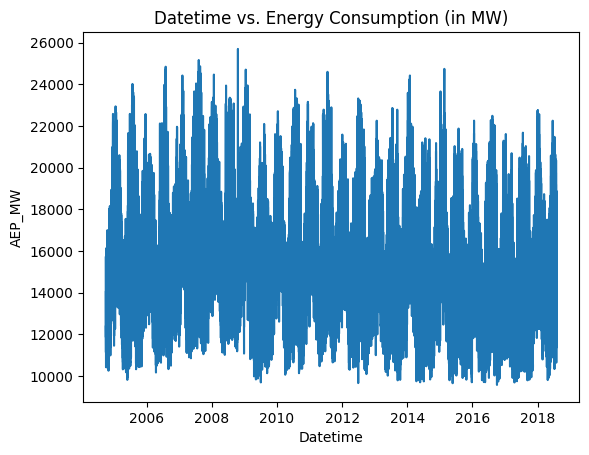

In [ ]:
sns.lineplot(data=df, x=df.index, y=df['AEP_MW']).set(title='Datetime vs. Energy Consumption (in MW)')
plt.show()

## Data splitting

Split the data into training and testing data, split data at 01-01-2016

In [ ]:
train = df.loc[df.index < '01-01-2016']
test = df.loc[df.index >= '01-01-2016']

plot the train and test data

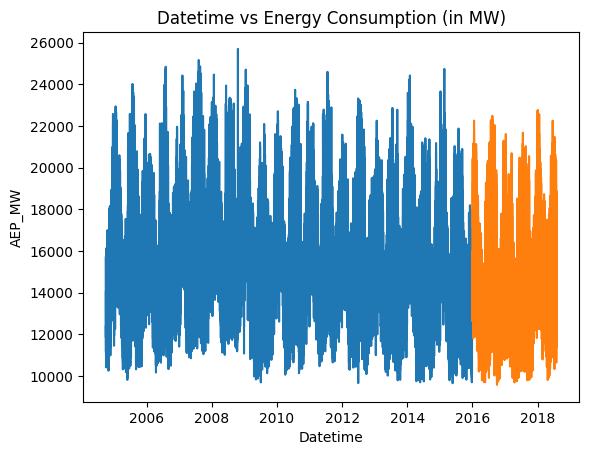

In [ ]:
sns.lineplot(data=train, x=train.index, y=train['AEP_MW'])
sns.lineplot(data=test, x=test.index, y=test['AEP_MW'])
plt.title("Datetime vs Energy Consumption (in MW)")
plt.show()

The blue portion is the training data and the orange is the testing data.

Plot data for a random week AND day, to visualize weekly and daily variations in data

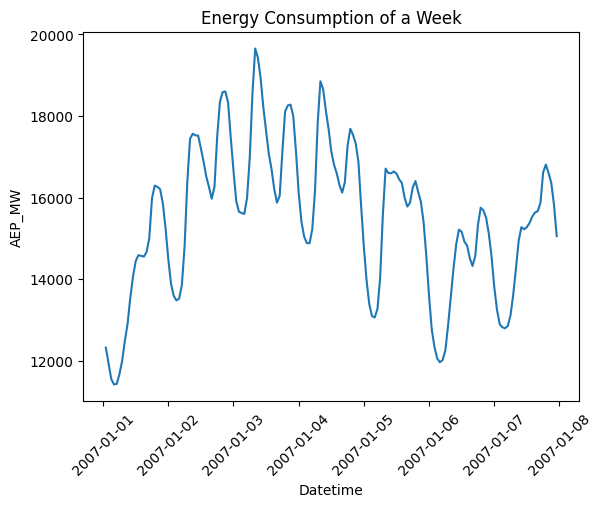

In [ ]:
week = df.loc[(df.index > '01-01-2007') & (df.index < '01-08-2007')]
sns.lineplot(data=week, x=week.index, y='AEP_MW').set(title='Energy Consumption of a Week')
plt.xticks(rotation=45)
plt.show()

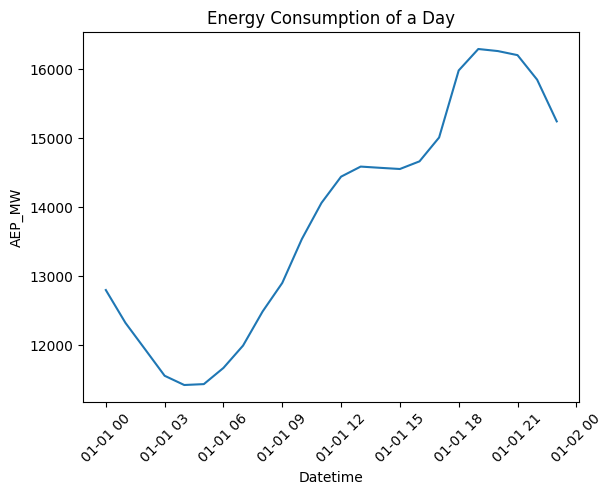

In [ ]:
day = df.loc[(df.index >= '01-01-2007') & (df.index < '01-02-2007')]
sns.lineplot(data=day, x=day.index, y='AEP_MW').set(title='Energy Consumption of a Day')
plt.xticks(rotation=45)
plt.show()

## Feature Creation


Create different features for: hour, day, month, year, week and append it to the data-frame

In [ ]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['week_of_year'] = df.index.isocalendar().week
    return df

df = create_features(df)
train = create_features(train)
test = create_features(test)

Make boxplots to depict energy consumption hourly and monthly.(x variable would be hour and month and y variable would be the feature 'AEP_MW'

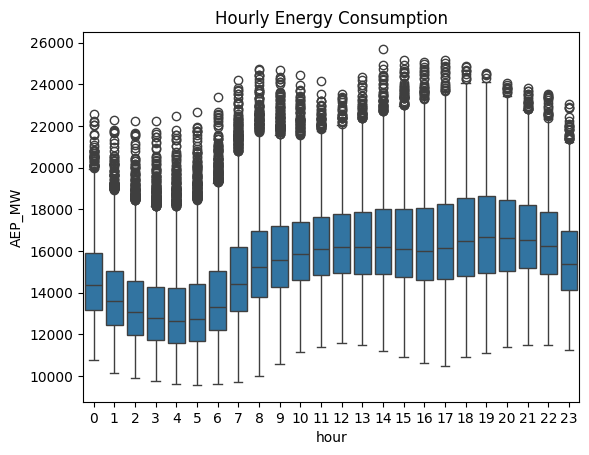

In [ ]:
sns.boxplot(data=df, x='hour', y='AEP_MW').set(title='Hourly Energy Consumption')
plt.show()

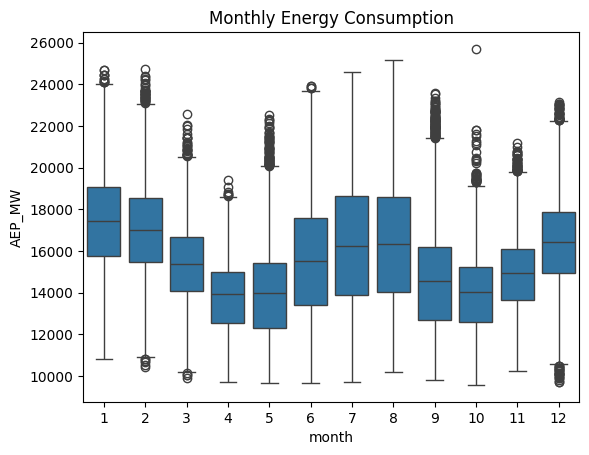

In [ ]:
sns.boxplot(data=df, x='month', y='AEP_MW').set(title='Monthly Energy Consumption')
plt.show()

## Model Creation and Estimation

Run a regression XGBoost model on the training and testing data-set. Take 1000 estimators and learning rate as 0.01

In [ ]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]

X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [ ]:
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Predict values for the testing set using the model and plot them

In [ ]:
predictions = reg.predict(X_test)
predictions

array([13486.817, 10922.412, 10620.822, ..., 17444.682, 16529.166,
       15936.844], dtype=float32)

Use RMSE to find out the accuracy of your model

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE = {rmse:.2f}")

RMSE = 1841.39


Find the importance of each feature use

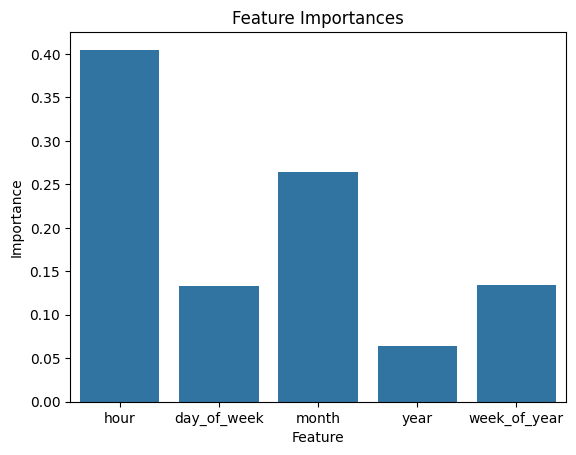

In [ ]:
sns.barplot(x=reg.feature_names_in_, y=reg.feature_importances_).set(xlabel='Feature', ylabel='Importance', title='Feature Importances')
plt.show()